In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn

In [2]:
from mglearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X,y = make_blobs(n_samples=(400,50),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)
pre_svc=svc.predict(X_test)
svc.score(X_test,y_test)
from sklearn.metrics import confusion_matrix#输出混沌矩阵
confusion_matrix(y_test,pre_svc)
accuracy = (93+6)/(11+3+93+6)

a=np.where(svc.decision_function(X_test)>1,1,0)#修改阈值
confusion_matrix(y_test,a)
accuracy1 = (102+2)/(113)
print("阈值为0时对应的精度：{:.3f}".format(accuracy))
print("阈值为1时对应的精度：{:.3f}".format(accuracy1))

阈值为0时对应的精度：0.876
阈值为1时对应的精度：0.920


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [3]:
from sklearn.metrics import precision_recall_curve#绘制准确率和召回率曲线
precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'recall')

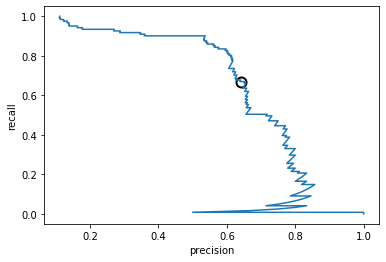

In [4]:
X,y = make_blobs(n_samples=(4000,500),centers=2,cluster_std=[7.,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)
precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")